In [1]:
import pandas as pd

# Download train/val data
print("Downloading training/validation dataset... ", end='')
trainval_df = pd.read_csv("https://ashwhall.github.io/download/mnist_csv/mnist_train.zip", header=None)
print("done.")

# Download test data
print("Downloading training/validation dataset... ", end='')
test_df = pd.read_csv("https://ashwhall.github.io/download/mnist_csv/mnist_test.zip", header=None)
print("done.")

In [2]:
print("Train/val nulls: ", trainval_df.isnull().sum().sum())
print("Test nulls:      ", test_df.isnull().sum().sum())

Train/val nulls:  0
Test nulls:       0


In [3]:
# sample the train examples
train_df = trainval_df.sample(frac=0.8, random_state=42)
# use 'drop' to take what's left
val_df = trainval_df.drop(train_df.index)

print("Train DataFrame:     ", train_df.shape)
print("Validation DataFrame:", val_df.shape)
print("Test DataFrame:      ", test_df.shape)

Train DataFrame:      (48000, 785)
Validation DataFrame: (12000, 785)
Test DataFrame:       (10000, 785)


In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8279,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np

In [6]:
# Utility function to extract the labels and images from a dataframe
def extract_images_labels(df):
    # Extract the first column values as labels
    labels = np.array(df.iloc[:, 0])
    
    # Extract the remaining columns as images
    images = np.array(df.iloc[:, 1:])
    
    # Reshape the images and convert to floats
    images = images.reshape(-1, 28, 28, 1).astype(np.float32)
    
    return images, labels


In [7]:
# Perform the extraction on each of the DataFrames
train_images, train_labels = extract_images_labels(train_df)
val_images, val_labels = extract_images_labels(val_df)
test_images, test_labels = extract_images_labels(test_df)

In [8]:
print("Train image shape:", train_images.shape)

Train image shape: (48000, 28, 28, 1)


In [9]:
# import a graph-plotting library
import matplotlib.pyplot as plt

# This function takes a list of images and a list of labels and plots the first n_images
def plot_some_images(images, labels, n_images=16):
    # set the figure size
    plt.figure(figsize=(12, 6))
    
    for i in range(n_images):
        # select a subplot in a grid
        plt.subplot(4, 4, i + 1)
        img = images[i]
        # select the channel dimension, depending on data format
        img = img[0] if img.shape[0] == 1 else img[..., 0]
        
        # plot the image with title and no axis ticks
        plt.imshow(img, cmap='gray', interpolation='nearest')
        plt.title(f"Value: {labels[i]}")
        plt.axis('off')
    plt.show()
    

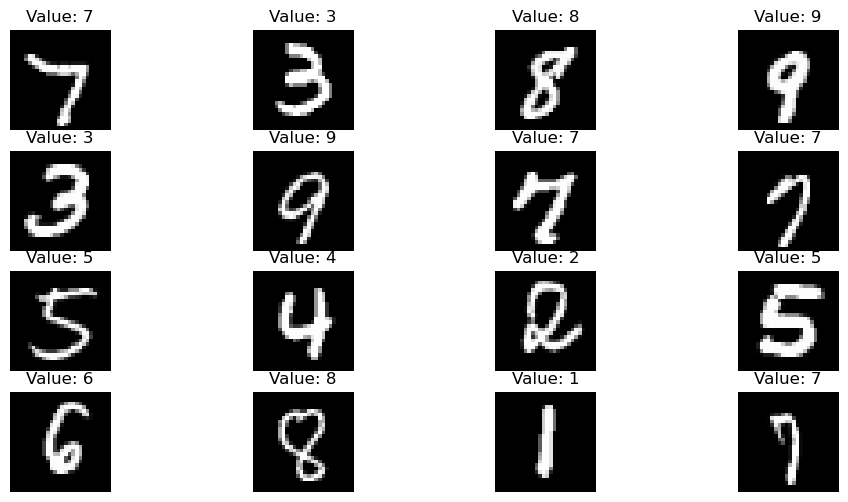

In [10]:
# plot some training images and labels
plot_some_images(train_images, train_labels)

In [11]:
# function to check class imbalance through plotting
def plot_label_distribution(labels, split):
    # plot a histogram with the given title
    plt.title(f"{split} distribution")
    plt.hist(labels, bins=10)
    # Label the axes
    plt.xlabel("Label value")
    plt.ylabel("Num examples")
    # Add the class labels along the x axis
    plt.xticks(range(10))
    plt.show()


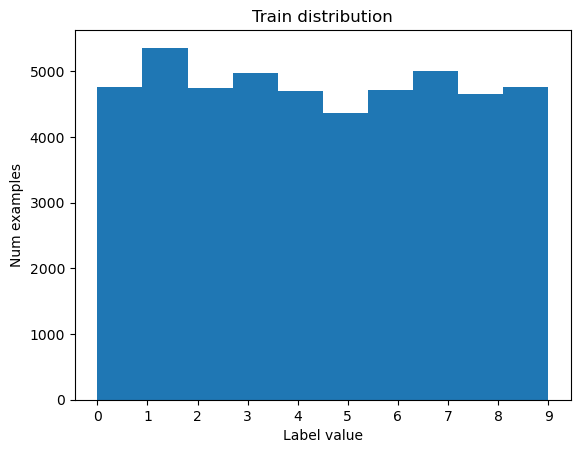

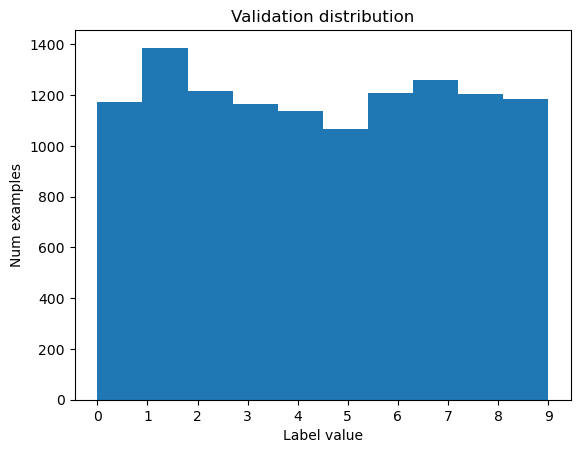

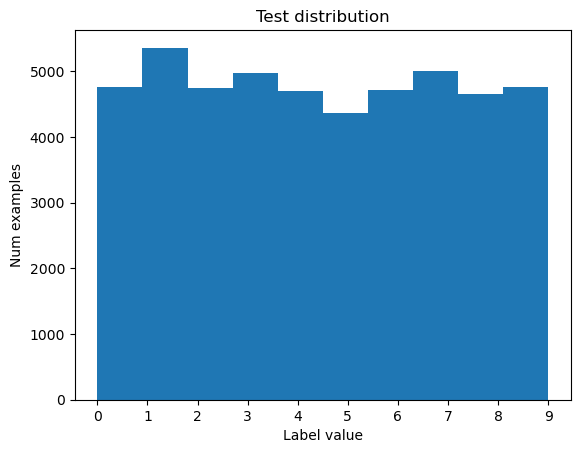

In [12]:
# Plot the distribution of each partition
plot_label_distribution(train_labels, "Train")
plot_label_distribution(val_labels, "Validation")
plot_label_distribution(train_labels, "Test")

In [ ]:
# import the base class
from torch.utils.data import Dataset

# Dataset class
class MNISTDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = 